Assignment 1: Neural Networks

In [ ]:
#loading the IMDB dataset

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]


1

In [5]:
len(train_labels)


25000

In [6]:
test_data

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [7]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in test_data])

9999

Generating reviews to text

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preparing Data

Multi-hot encoding of the integer sequences

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [10]:
#Data vectorization
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

**Label Vectorization**

In [15]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Building model using relu and compiling it**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [19]:
#Model Compiling
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [20]:
#Validating your approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**ModelTraining **

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.6529 - loss: 0.6431 - val_accuracy: 0.8487 - val_loss: 0.4590
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8744 - loss: 0.4047 - val_accuracy: 0.8764 - val_loss: 0.3438
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9074 - loss: 0.2851 - val_accuracy: 0.8618 - val_loss: 0.3295
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9217 - loss: 0.2284 - val_accuracy: 0.8842 - val_loss: 0.2873
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9401 - loss: 0.1832 - val_accuracy: 0.8771 - val_loss: 0.3069
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9453 - loss: 0.1615 - val_accuracy: 0.8817 - val_loss: 0.2943
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9566 - loss: 0.1411 - val_accuracy: 0.8851 - val_loss: 0.2854
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9661 - loss: 0.1165 - val_accuracy: 0.8841 - v

In the training set, there was a loss of 0.6431 and an accuracy of 0.6529, while on the validation set, there was a loss of 0.4590 and an accuracy of 0.8487.

As the training proceeded, the model's loss and accuracy on the training set increased, and by the conclusion of the 20th epoch, the model had a loss of 0.0158 and an accuracy of 0.9980. At the end of the 20th epoch on the validation set, the model had a loss of 0.5278 and an accuracy of 0.8695. The model is overfitting to the training data.

In [22]:
history__dict = history.history
history__dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

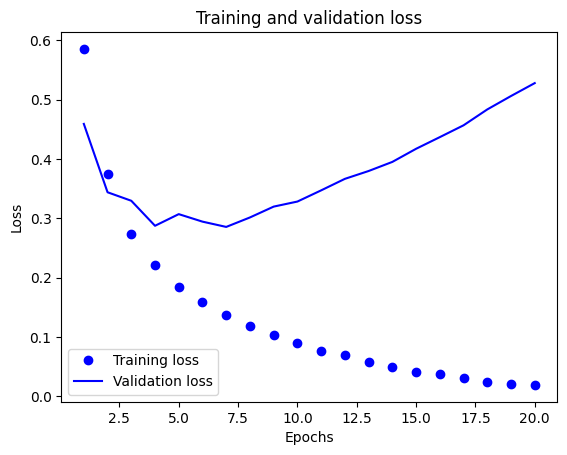

In [23]:
import matplotlib.pyplot as plt
history__dict = history.history
loss_values = history__dict["loss"]
val_loss_values = history__dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

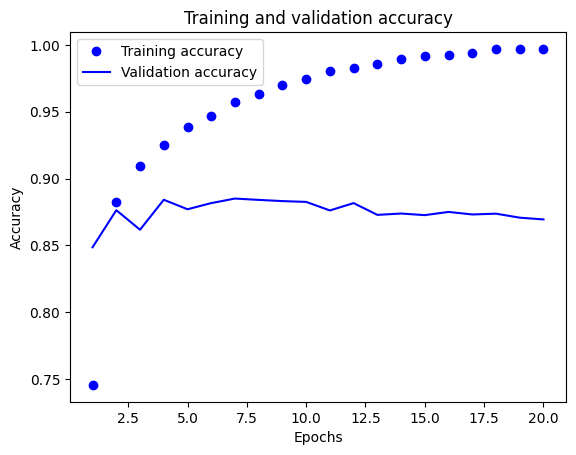

In [24]:
plt.clf()
acc = history__dict["accuracy"]
val_acc = history__dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**The two graphs indicate that, beyond a certain epoch, the model's ability to predict fresh data decreases due to overfitting of the training set. However, more effort on the topic of analysis, such as adjusting the model's hyperparameters or applying regularization techniques, might be required to improve the model's output.**

**Retraining the model**

In [25]:
np.random.seed(123)
model_1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9443 - loss: 0.2244
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9627 - loss: 0.1232
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9690 - loss: 0.1020
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9770 - loss: 0.0777
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8578 - loss: 0.4610


In [26]:
results

[0.456211119890213, 0.8596000075340271]

**The neural network model obtained an accuracy of 85.96% for the test dataset. The loss value in the test dataset is 0.456.**

**Considering the trained model to generate predicitions on new data**

In [27]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.01551194],
       [1.        ],
       [0.10434362],
       ...,
       [0.04919367],
       [0.00615027],
       [0.8572437 ]], dtype=float32)

**Building a neural network with 1 hidden layer**

In [31]:
model_1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history_1 = model_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.7141 - loss: 0.5863 - val_accuracy: 0.8670 - val_loss: 0.4025
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8918 - loss: 0.3547 - val_accuracy: 0.8803 - val_loss: 0.3314
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9187 - loss: 0.2699 - val_accuracy: 0.8861 - val_loss: 0.3031
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9288 - loss: 0.2287 - val_accuracy: 0.8731 - val_loss: 0.3083
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9377 - loss: 0.1995 - val_accuracy: 0.8879 - val_loss: 0.2807
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9453 - loss: 0.1775 - val_accuracy: 0.8878 - val_loss: 0.2755
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9542 - loss: 0.1568 - val_accuracy: 0.8857 - val_loss: 0.2782
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9567 - loss: 0.1436 - val_accuracy: 0.8857 - v

In [32]:
history_dict = history_1.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

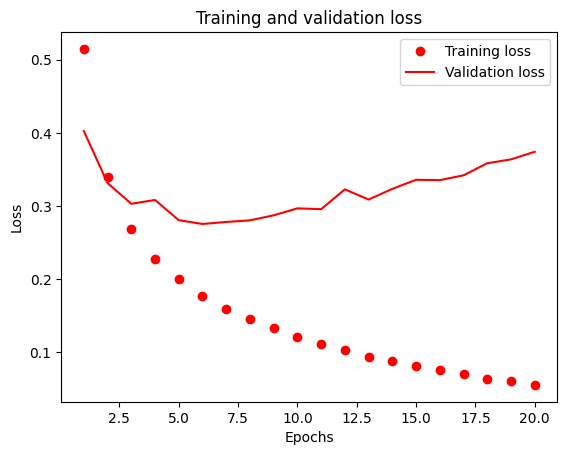

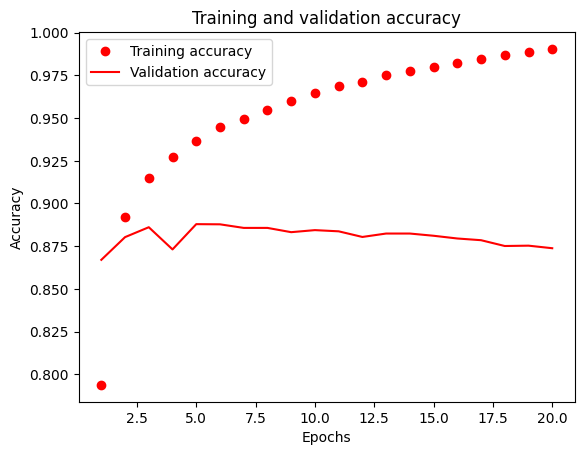

In [33]:
import matplotlib.pyplot as plt
history_dict = history_1.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [38]:
model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_2.fit(x_train, y_train, epochs=5, batch_size=512)
results_2 = model_2.evaluate(x_test, y_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7398 - loss: 0.5388
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9025 - loss: 0.2972
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9248 - loss: 0.2287
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9318 - loss: 0.2004
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9388 - loss: 0.1785
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8854 - loss: 0.2824


In [39]:
results_2

[0.28149154782295227, 0.8865600228309631]

**The test set has a loss of 0.2814 and an accuracy of 88.65%.**

In [40]:
model_2.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.20559739],
       [0.9994671 ],
       [0.6118028 ],
       ...,
       [0.09021828],
       [0.0655451 ],
       [0.5595269 ]], dtype=float32)

**Creating a neural network with three hidden layers**

In [43]:

model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history_3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6906 - loss: 0.6166 - val_accuracy: 0.8519 - val_loss: 0.4187
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8876 - loss: 0.3491 - val_accuracy: 0.8802 - val_loss: 0.3125
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9210 - loss: 0.2393 - val_accuracy: 0.8632 - val_loss: 0.3288
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9383 - loss: 0.1868 - val_accuracy: 0.8817 - val_loss: 0.2936
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9534 - loss: 0.1490 - val_accuracy: 0.8882 - val_loss: 0.2841
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9629 - loss: 0.1208 - val_accuracy: 0.8837 - val_loss: 0.2982
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9753 - loss: 0.0904 - val_accuracy: 0.8813 - val_loss: 0.3251
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9799 - loss: 0.0765 - val_accuracy: 0.8780 - v

In [44]:
history_dict3 = history_3.history
history_dict3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

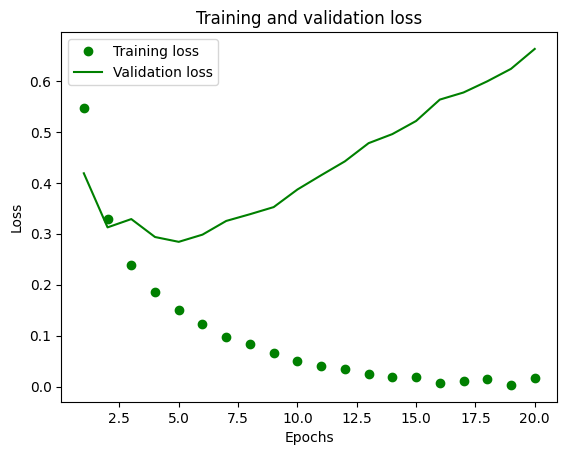

In [45]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

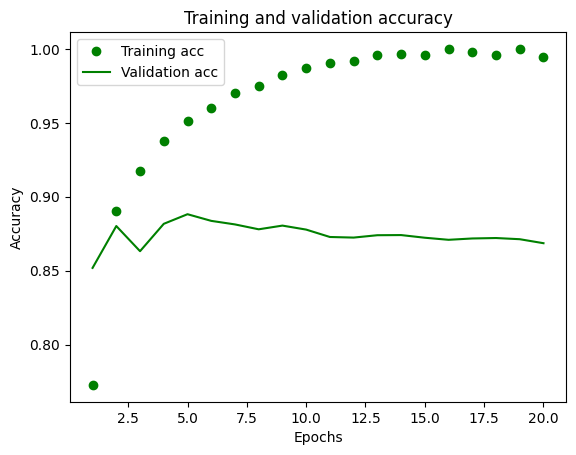

In [46]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [47]:
model_4 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_4.fit(x_train, y_train, epochs=3, batch_size=512)
results_4 = model_3.evaluate(x_test, y_test)


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7254 - loss: 0.5812
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8953 - loss: 0.2942
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9255 - loss: 0.2110
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8542 - loss: 0.7297


**The test set has a loss of 0.7193 and an accuracy of 85.71%.**

In [48]:
results_4

[0.7193292379379272, 0.8571199774742126]

In [49]:
model_4.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.14867084],
       [0.9997494 ],
       [0.81716657],
       ...,
       [0.09737069],
       [0.08455774],
       [0.6372096 ]], dtype=float32)

**The accuracy of the model does not rise significantly as the number of layers increases. However, compared to the other two, the three-layer model is more accurate.**

**Choosing how many units to include in the hidden layers is a crucial step in creating the overall architecture of your neural network.**

**These layers have a big impact on the result even though they don't interface directly with the outer environment. **

### **Building Neural Network with 32 units.**

In [54]:

model_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history_32 = model_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6971 - loss: 0.5824 - val_accuracy: 0.8701 - val_loss: 0.3579
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8987 - loss: 0.3023 - val_accuracy: 0.8661 - val_loss: 0.3254
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9228 - loss: 0.2267 - val_accuracy: 0.8746 - val_loss: 0.3031
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9344 - loss: 0.1836 - val_accuracy: 0.8588 - val_loss: 0.3488
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9424 - loss: 0.1599 - val_accuracy: 0.8731 - val_loss: 0.3212
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9599 - loss: 0.1225 - val_accuracy: 0.8804 - val_loss: 0.3019
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9664 - loss: 0.1045 - val_accuracy: 0.8842 - val_loss: 0.3132
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9731 - loss: 0.0893 - val_accuracy: 0.8792 - v

In [55]:
history_dict32 = history_32.history
history_dict32.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

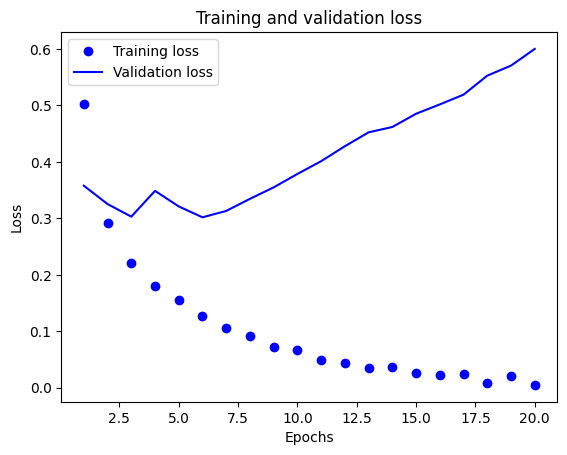

In [56]:
loss_values = history_dict32["loss"]
val_loss_values = history_dict32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

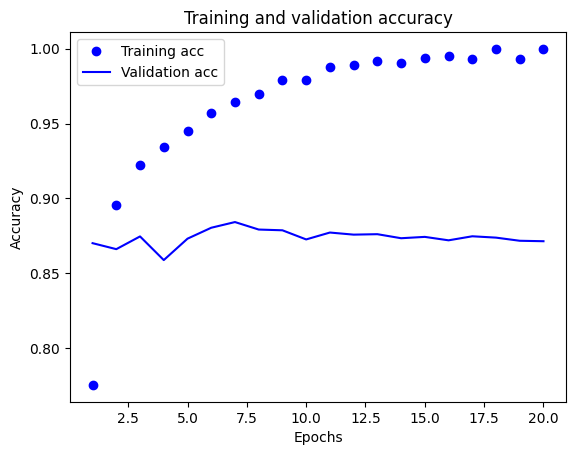

In [57]:
plt.clf()
acc = history_dict32["accuracy"]
val_acc = history_dict32["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [58]:
history_32 = model_32.fit(x_train, y_train, epochs=3, batch_size=512)
results_32 = model_32.evaluate(x_test, y_test)
results_32

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9413 - loss: 0.2341
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9633 - loss: 0.1196
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9739 - loss: 0.0843
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8648 - loss: 0.4170


[0.41072878241539, 0.8668799996376038]

In [59]:
model_32.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.02375588],
       [0.9999999 ],
       [0.60615736],
       ...,
       [0.03472595],
       [0.02269413],
       [0.9642356 ]], dtype=float32)

**The validation set has an accuracy of 86.68 percent.**

**Training the model with 64 units**

In [62]:

model_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history_64 = model_64.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6924 - loss: 0.5905 - val_accuracy: 0.8714 - val_loss: 0.3536
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.8907 - loss: 0.3093 - val_accuracy: 0.8201 - val_loss: 0.4140
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.8975 - loss: 0.2560 - val_accuracy: 0.8900 - val_loss: 0.2743
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9381 - loss: 0.1797 - val_accuracy: 0.8792 - val_loss: 0.3008
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9499 - loss: 0.1465 - val_accuracy: 0.8799 - val_loss: 0.3141
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9566 - loss: 0.1243 - val_accuracy: 0.8832 - val_loss: 0.3046
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9669 - loss: 0.1032 - val_accuracy: 0.8613 - val_loss: 0.4146
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9708 - loss: 0.0879 - val_accuracy: 0.8819 - v

In [65]:
history_dict64 = history_64.history
history_dict64.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

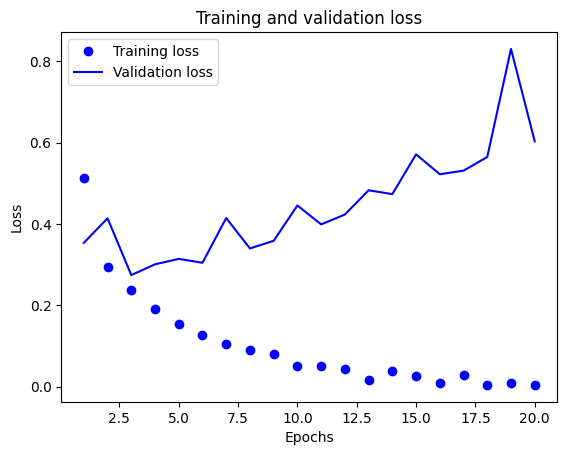

In [66]:
loss_values = history_dict64["loss"]
val_loss_values = history_dict64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

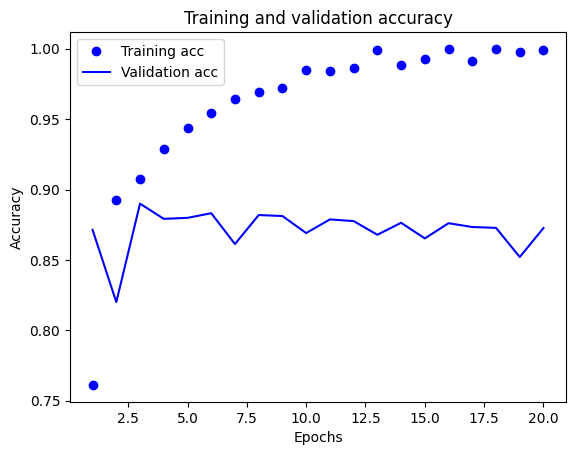

In [67]:
plt.clf()
acc = history_dict64["accuracy"]
val_acc = history_dict64["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [68]:
history_64 = model_64.fit(x_train, y_train, epochs=3, batch_size=512)
results_64 = model_64.evaluate(x_test, y_test)
results_64

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9447 - loss: 0.2026
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.9701 - loss: 0.0946
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9844 - loss: 0.0564
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8685 - loss: 0.3984


[0.39715883135795593, 0.8709200024604797]

In [69]:
model_64.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.01352466],
       [0.99999934],
       [0.371952  ],
       ...,
       [0.0509583 ],
       [0.01947535],
       [0.94237393]], dtype=float32)


**Validation set has an accuracy of 87.09%.**

### **Training the model with 128 units**

In [70]:
np.random.seed(123)
model_128U = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128U.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history_128 = model_128U.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.6860 - loss: 0.5975 - val_accuracy: 0.7534 - val_loss: 0.5133
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8758 - loss: 0.3124 - val_accuracy: 0.8874 - val_loss: 0.2842
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9231 - loss: 0.2146 - val_accuracy: 0.8860 - val_loss: 0.2769
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.9340 - loss: 0.1750 - val_accuracy: 0.8830 - val_loss: 0.2924
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9396 - loss: 0.1554 - val_accuracy: 0.8687 - val_loss: 0.3478
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.9576 - loss: 0.1144 - val_accuracy: 0.8866 - val_loss: 0.3003
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9750 - loss: 0.0831 - val_accuracy: 0.8840 - val_loss: 0.3249
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.9810 - loss: 0.0626 - val_accuracy: 0.868

In [71]:
history_dict128 = history_128.history
history_dict128.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

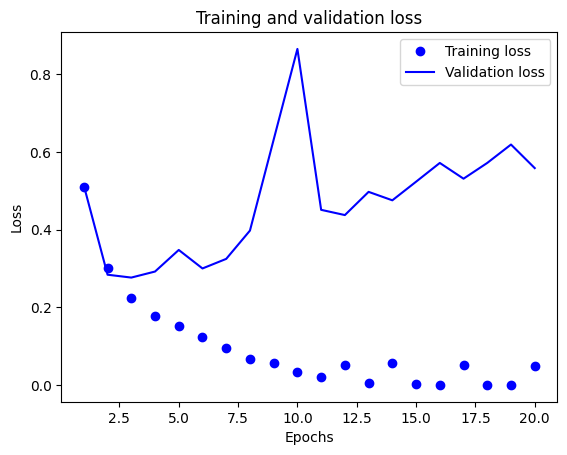

In [72]:
loss_values = history_dict128["loss"]
val_loss_values = history_dict128["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

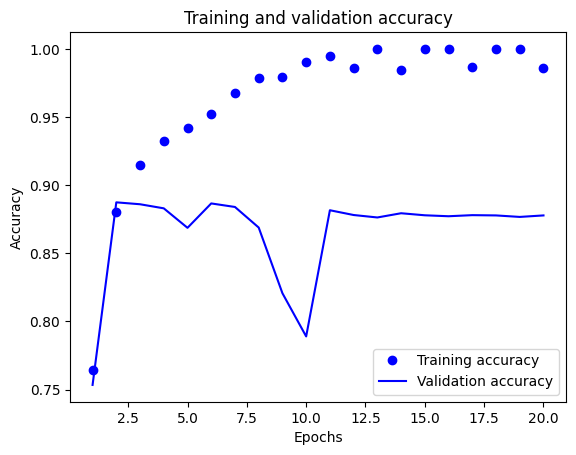

In [74]:
plt.clf()
acc = history_dict128["accuracy"]
val_acc = history_dict128["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [75]:
history_128 = model_128U.fit(x_train, y_train, epochs=2, batch_size=512)
results_128 = model_128U.evaluate(x_test, y_test)
results_128

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9497 - loss: 0.1745
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9765 - loss: 0.0760
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8732 - loss: 0.3677


[0.3665291368961334, 0.8761199712753296]

In [76]:
model_128U.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


array([[0.01706741],
       [0.9999987 ],
       [0.58434033],
       ...,
       [0.01978755],
       [0.00707337],
       [0.77006465]], dtype=float32)

**The validation set has an accuracy of 87.61%.**

### **MSE Loss Function**




In [77]:

model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Model compilation
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
# Model Fit
np.random.seed(123)
history_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6827 - loss: 0.2149 - val_accuracy: 0.8328 - val_loss: 0.1402
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8743 - loss: 0.1174 - val_accuracy: 0.8602 - val_loss: 0.1124
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9113 - loss: 0.0825 - val_accuracy: 0.8846 - val_loss: 0.0913
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9271 - loss: 0.0671 - val_accuracy: 0.8864 - val_loss: 0.0872
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9437 - loss: 0.0537 - val_accuracy: 0.8887 - val_loss: 0.0839
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9487 - loss: 0.0484 - val_accuracy: 0.8878 - val_loss: 0.0830
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9561 - loss: 0.0429 - val_accuracy: 0.8819 - val_loss: 0.0853
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9620 - loss: 0.0374 - val_accuracy: 0.8786 - v

In [78]:
history_dict_MSE = history_MSE.history
history_dict_MSE.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

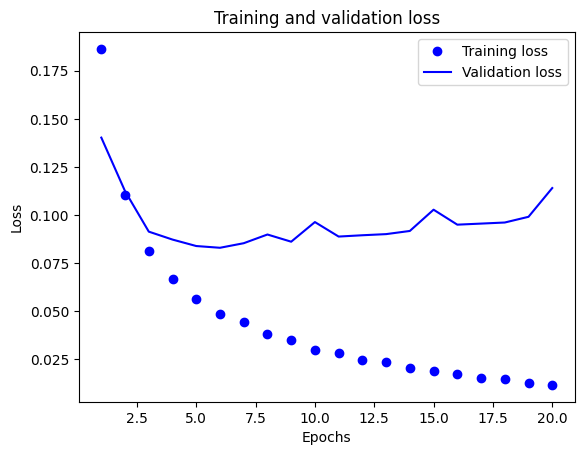

In [79]:
import matplotlib.pyplot as plt
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

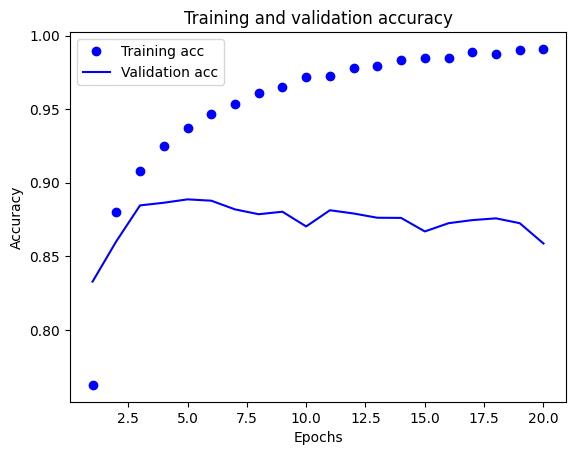

In [80]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [81]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9446 - loss: 0.0460
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9584 - loss: 0.0368
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9615 - loss: 0.0340
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9669 - loss: 0.0313
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9754 - loss: 0.0245
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9758 - loss: 0.0243
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9783 - loss: 0.0215
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9822 - loss: 0.0190
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8634 - loss: 0.1092


[0.10654614120721817, 0.8679199814796448]

In [82]:
model_MSE.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.02819098],
       [1.        ],
       [0.8537874 ],
       ...,
       [0.04492849],
       [0.01665431],
       [0.7368218 ]], dtype=float32)


### Tanh Activation Function

In [83]:
np.random.seed(123)
model_tanh_Activ = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh_Activ.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)

history_tanh_Activ = model_tanh_Activ.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.7003 - loss: 0.5840 - val_accuracy: 0.8689 - val_loss: 0.3793
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8936 - loss: 0.3246 - val_accuracy: 0.8730 - val_loss: 0.3140
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9281 - loss: 0.2246 - val_accuracy: 0.8788 - val_loss: 0.2946
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9366 - loss: 0.1823 - val_accuracy: 0.8819 - val_loss: 0.2883
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9575 - loss: 0.1346 - val_accuracy: 0.8859 - val_loss: 0.2846
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9673 - loss: 0.1100 - val_accuracy: 0.8827 - val_loss: 0.3168
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9751 - loss: 0.0855 - val_accuracy: 0.8663 - val_loss: 0.3956
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9766 - loss: 0.0791 - val_accuracy: 0.8737 - 

In [84]:
history_dict_tanh = history_tanh_Activ.history
history_dict_tanh.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

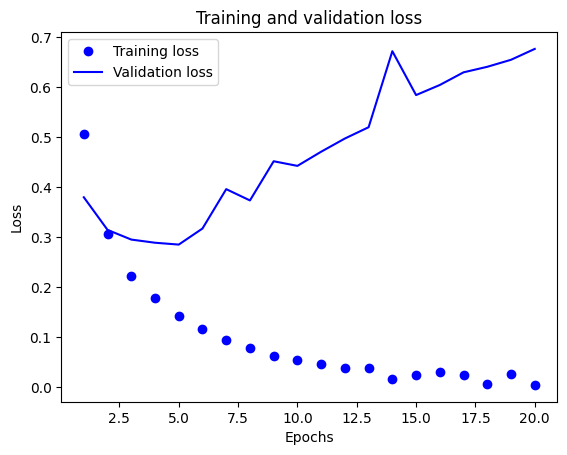

In [85]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

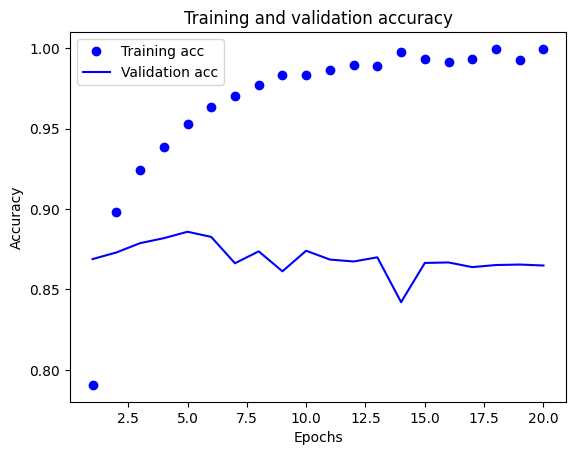

In [86]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [87]:
model_tanh_Activ.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = model_tanh_Activ.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9383 - loss: 0.3002
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9605 - loss: 0.1455
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9686 - loss: 0.1064
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9726 - loss: 0.0912
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9761 - loss: 0.0825
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9787 - loss: 0.0678
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9818 - loss: 0.0612
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9858 - loss: 0.0515
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8524 - loss: 0.5798


[0.5721977353096008, 0.8536400198936462]

### **Adam Optimizer Function**

In [88]:
model_adam_Opt_fun = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_adam_Opt_fun.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)

history_adam_Opt = model_adam_Opt_fun.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6922 - loss: 0.6310 - val_accuracy: 0.8617 - val_loss: 0.4163
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8986 - loss: 0.3405 - val_accuracy: 0.8872 - val_loss: 0.2994
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9323 - loss: 0.2157 - val_accuracy: 0.8886 - val_loss: 0.2788
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9540 - loss: 0.1581 - val_accuracy: 0.8874 - val_loss: 0.2822
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9698 - loss: 0.1173 - val_accuracy: 0.8841 - val_loss: 0.2924
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9818 - loss: 0.0864 - val_accuracy: 0.8834 - val_loss: 0.3149
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9832 - loss: 0.0758 - val_accuracy: 0.8803 - val_loss: 0.3381
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9898 - loss: 0.0582 - val_accuracy: 0.8767 - v

In [89]:
history_dict_adam = history_adam_Opt.history
history_dict_adam.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

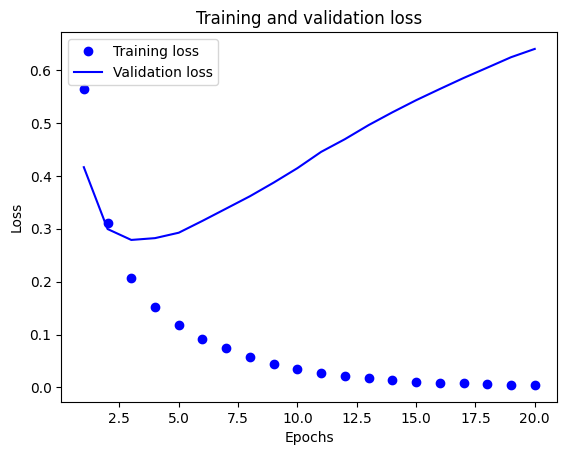

In [90]:
loss_values = history_dict_adam["loss"]
val_loss_values = history_dict_adam["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

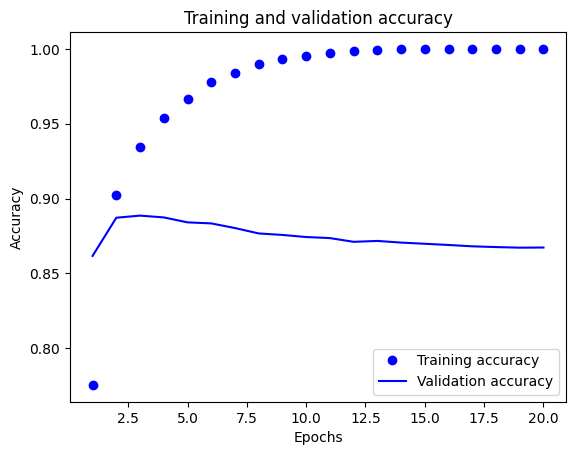

In [91]:
plt.clf()
acc = history_dict_adam["accuracy"]
val_acc = history_dict_adam["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [92]:
model_adam_Opt_fun.fit(x_train, y_train, epochs=4, batch_size=512)
results_adam = model_adam_Opt_fun.evaluate(x_test, y_test)
results_adam

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9446 - loss: 0.2353
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9679 - loss: 0.1153
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9776 - loss: 0.0821
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9852 - loss: 0.0602
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8562 - loss: 0.5261


[0.5213606357574463, 0.856440007686615]

### **Regularization**

In [93]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_regularization = model_regularization.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularization = history_model_regularization.history
history_dict_regularization.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.6804 - loss: 0.6472 - val_accuracy: 0.8635 - val_loss: 0.4380
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8951 - loss: 0.3819 - val_accuracy: 0.8861 - val_loss: 0.3548
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9202 - loss: 0.2960 - val_accuracy: 0.8883 - val_loss: 0.3323
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9343 - loss: 0.2524 - val_accuracy: 0.8884 - val_loss: 0.3264
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9450 - loss: 0.2240 - val_accuracy: 0.8877 - val_loss: 0.3309
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9529 - loss: 0.2073 - val_accuracy: 0.8826 - val_loss: 0.3375
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9605 - loss: 0.1893 - val_accuracy: 0.8822 - val_loss: 0.3433
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9634 - loss: 0.1803 - val_accuracy: 0.8842 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

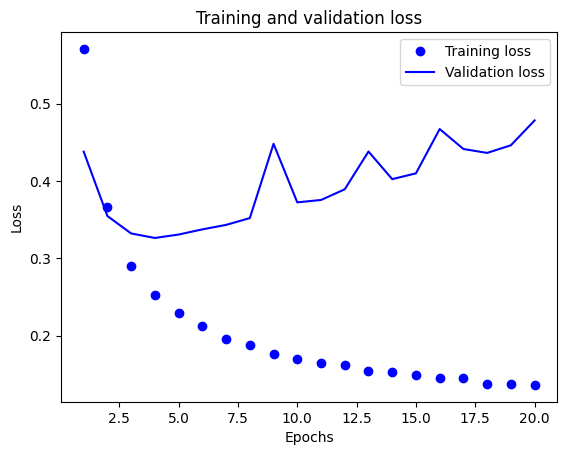

In [95]:
loss_values = history_dict_regularization["loss"]
val_loss_values = history_dict_regularization["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

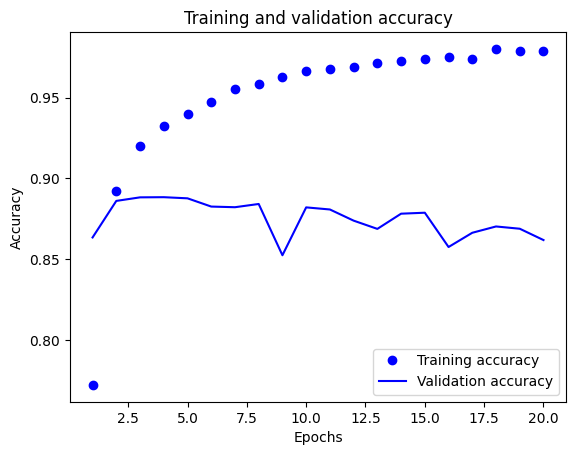

In [96]:
plt.clf()
acc = history_dict_regularization["accuracy"]
val_acc = history_dict_regularization["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [97]:
model_regularization.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularization = model_regularization.evaluate(x_test, y_test)
results_regularization

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9379 - loss: 0.2577
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9499 - loss: 0.2072
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9522 - loss: 0.1934
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9532 - loss: 0.1905
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9634 - loss: 0.1691
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9626 - loss: 0.1712
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9644 - loss: 0.1619
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9663 - loss: 0.1613
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8345 - loss: 0.5353


[0.5360234975814819, 0.8338000178337097]

**The loss on test set is 0.5360 and accuracy is 83.38%.**

### **Dropout**

In [98]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.5826 - loss: 0.6634 - val_accuracy: 0.8216 - val_loss: 0.5146
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7414 - loss: 0.5365 - val_accuracy: 0.8710 - val_loss: 0.4035
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8003 - loss: 0.4523 - val_accuracy: 0.8826 - val_loss: 0.3466
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8412 - loss: 0.3998 - val_accuracy: 0.8844 - val_loss: 0.3105
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8705 - loss: 0.3498 - val_accuracy: 0.8789 - val_loss: 0.3062
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8930 - loss: 0.2999 - val_accuracy: 0.8873 - val_loss: 0.2783
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9018 - loss: 0.2774 - val_accuracy: 0.8908 - val_loss: 0.2747
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9173 - loss: 0.2444 - val_accuracy: 0.8872 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

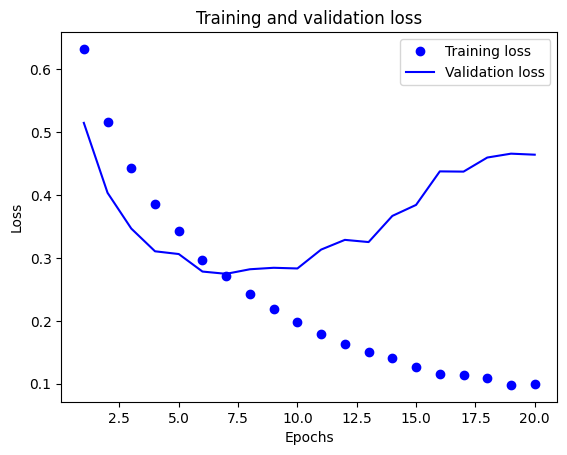

In [100]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

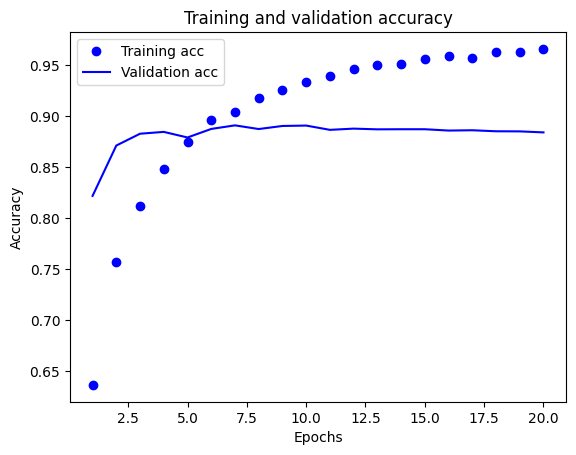

In [101]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [102]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9212 - loss: 0.2615
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9275 - loss: 0.2160
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9357 - loss: 0.1908
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9342 - loss: 0.1807
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9411 - loss: 0.1675
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9450 - loss: 0.1643
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9479 - loss: 0.1519
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9465 - loss: 0.1420
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8738 - loss: 0.4931


[0.4857867658138275, 0.8753600120544434]

**The loss on the test set is 0.4857 and accuracy is 87.53%.**

**Training the model with hyper tuned parameters**

In [103]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_Hyper_tune = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper_tune.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Hyper_tune = model_Hyper_tune.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper_tune.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.5403 - loss: 0.2591 - val_accuracy: 0.7880 - val_loss: 0.2076
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6877 - loss: 0.2160 - val_accuracy: 0.8596 - val_loss: 0.1420
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7833 - loss: 0.1682 - val_accuracy: 0.8693 - val_loss: 0.1133
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8442 - loss: 0.1372 - val_accuracy: 0.8710 - val_loss: 0.1057
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8818 - loss: 0.1094 - val_accuracy: 0.8830 - val_loss: 0.0977
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8956 - loss: 0.0989 - val_accuracy: 0.8792 - val_loss: 0.1043
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9184 - loss: 0.0816 - val_accuracy: 0.8725 - val_loss: 0.1124
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9244 - loss: 0.0752 - val_accuracy: 0.8882 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

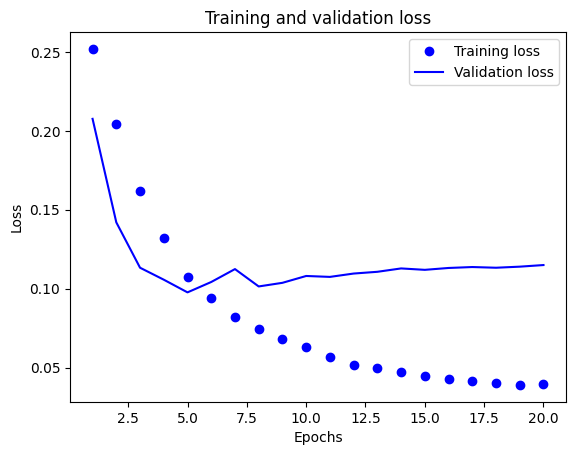

In [104]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

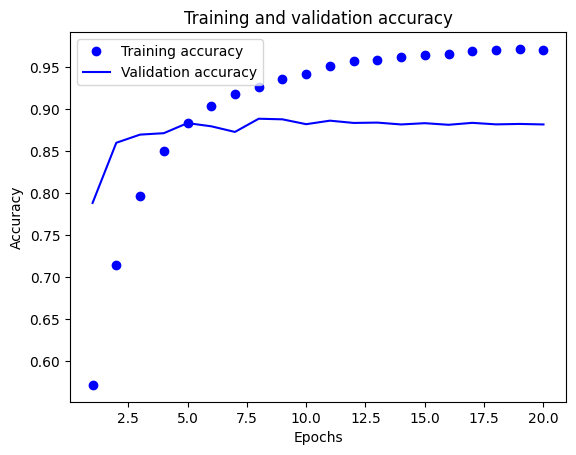

In [105]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [106]:
model_Hyper_tune.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper_tune.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9292 - loss: 0.0729
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9350 - loss: 0.0672
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9415 - loss: 0.0614
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9503 - loss: 0.0549
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9524 - loss: 0.0531
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9538 - loss: 0.0520
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9587 - loss: 0.0484
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9596 - loss: 0.0477
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8765 - loss: 0.1156


[0.11357723921537399, 0.8790799975395203]

### Summary

In [107]:
All_Models_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularization[0],results_tanh[0]])*100
All_Models_Loss
All_Models_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularization[1],results_tanh[1]])*100
All_Models_Accuracy
Labels=['Model_Dropout','Model_Hyper_tune','Model_MSE','model_regularization','model_tanh_Activ']
plt.clf()

<Figure size 640x480 with 0 Axes>

### Compilation

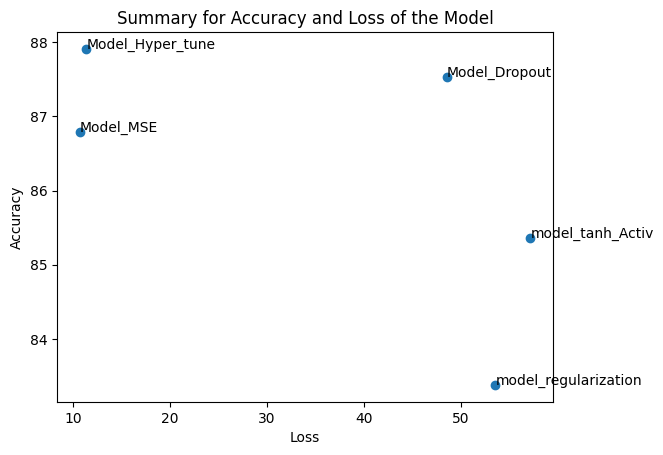

In [108]:
fig, ax = plt.subplots()
ax.scatter(All_Models_Loss,All_Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Models_Loss[i],All_Models_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss of the Model")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()